# Experimental Design - Can a running shoe design make a runner faster?

## Introduction

Ultra-Trail du Mont-Blanc (UTMB) is a 166 km single-stage mountain ultra-marathon that follows the Tour du Mont Blanc hiking loop through 3 countries beginning and ending in Chaminox, France.  It is as well-known for its striking beauty and as it is for being an utterly brutal race with about 9,500 meters of elevation change and much of the race at over 2,500 meters above sea level.  When many summertime backpackers take 7 to 9 days to walk the entire trail, runners attempt to complete the route in just under 2 days.  Historically, the majority of runners do not finish due to missing the strict timing cutoffs.  While the best runners complete the loop in slightly more than 20 hours, most runners take 32 to 46 hours to reach the finish line and will have to run through two nights in order to complete the race. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind
from datetime import datetime, timedelta

__Dataset:__ https://www.kaggle.com/ceruleansea/ultratrail-du-montblanc-20032017

The dataset was acquired from a post on Kaggle.  The user scaped the data from the UTMB Wikipedia page.  

The data was in a .csv format and each file contained the results by year.  Each dataset contained rows of data for each runner with attribute columns such as: name, rank, category, nationality, time and some timing splits denoting when each runner passed a landmark along the course.

The data needed some refining.  First, I excluded a couple years because of incomplete data - 2003 data excluded runners who did not finish(DNF).  In 2010, the race was halted due to severe weather.  2012 was included, but, that year the UTMB was only held as a 100K race due to heavy snow.

Nationality data was in both upper-case and lower-case formats so that needed to be cleaned up to be more consistant.  Nationality was also dropped from all DNF results.

In [2]:
# DATA YEARS ARE FROM 2003-17.  EXCLUDED 2003 (INCOMPLETE DATA) & 2010 (RACE WAS HALTED THEN RESTARTED)
# IN 2012, THE RACE WAS SHORTENED TO 100K DUE TO SNOW

years = ['04','05','06','07','08','09','11','12','13','14','15','16','17']
allresults = pd.DataFrame()

# TAKES DATA FROM .CSV FILES AND ADDS TO THE DATAFRAME
for x in years:
    # INTERATE THROUGH ALL THE DATA
    data = pd.read_csv('https://raw.githubusercontent.com/CascadiaRunner/Thinkful-Capstone-1/master/utmb_20' + x + '.csv')
    
    # CHANGES ALL NATIONALITY DATA TO UPPERCASE
    data['nationality'] = data['nationality'].str.upper()
    
    # PULLS DATA FROM THE .CSV FILES FOR ANALYSIS
    allresults = pd.concat([data['rank'], 
                            data['nationality'], 
                            data['category'], 
                            data['name'], 
                            data['time']], axis=1).append(allresults)

Time data was imported as a string and needed to changed to timedelta format for analysis and visualization.  Below, I created a function that would convert the string to a timedelta.

In [3]:
def convert_string_to_datetime(time_string):
    # ADDED THE DAYS COLUMN TO THE TIME TO REPRESENT 1 24-HR PERIOD
    # MUST BE A NUMBERED DAY, HENCE '01' IS ADDED
    time_string = "01:" + str(time_string)
    
    # CONVERTING THE VALUES OVER 24 HOURS TO DAYS
    hrs = int(time_string[3:5])
    if hrs > 23:
        time_string = '02:' + str(hrs-24) + time_string[5:]
        
    # RETURNS TIMEDELTA WITH DAYS, HOURS, MINUTES, SECONDS    
    t=datetime.strptime(time_string, "%d:%H:%M:%S")
    delta = timedelta(days=t.day-1, hours=t.hour, minutes=t.minute, seconds=t.second)
    return delta

With the visualization below, we can see that the vast majority of runners finish the race in over 40 hours.  In fact, the median finishing time is 39 hours, 38 minutes. 

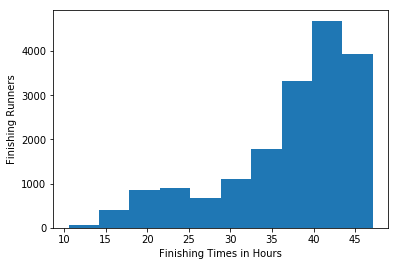

In [4]:
# REMOVE DNFS
justfinishers = allresults[allresults['nationality'] != ' ']
justfinishers = justfinishers.dropna()

# CHANGE CONVERT TIME STRING TO DATETIME
justfinishers['timeparse'] = justfinishers['time'].apply(convert_string_to_datetime)

# CREATE A CHART SHOWING WHEN RUNNERS FINISH THE UTMB
justfinishers['hours'] = justfinishers['timeparse'].dt.total_seconds() / 60 / 60
plt.hist(justfinishers['hours'])
plt.xlabel('Finishing Times in Hours')
plt.ylabel('Finishing Runners')
plt.show()

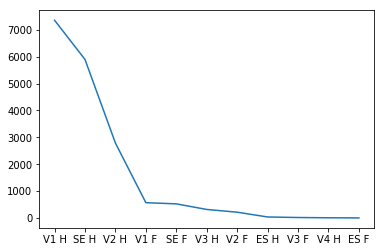

In [5]:
# UTMB FINISHERS BY CATEGORY
plt.plot(pd.value_counts(justfinishers['category'].values, sort=True))
plt.show()

Men out number women participants 10 to 1 at UTMB.  Not surprisingly, the majority of UTMB finishers are also men.  Their top age categories are Seniors, Masters 1 and Masters 2.  In the data plot below we can see just how much more represented these age/gender groups are at UTMB over the others.  I used the describe function below to further break down the finisher categories. Observing the mean rank, standard deviation, min (best finish) we can observe that these 3 categories have performed better than the others. 

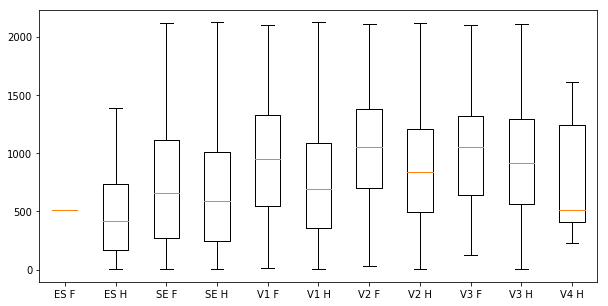

In [6]:
# CREATES A LIST OF CATEGORIES AND SORTS THEM
catlist = justfinishers['category'].unique()
catlist.sort()

rankedcat = []
# ITERATE THROUGH EACH CATEGORY TO GET EACH RUNNERS RANK
for x in catlist:
    rankedcat.append(justfinishers.loc[justfinishers['category'] == x, 'rank'])
    
# BOX PLOT OF CHECK CATEGORY
plt.figure(1, figsize=(10,5))
plt.boxplot(rankedcat, labels=catlist)
plt.show()

The box plots above show the distribution of ranking of each category.  We can see a larger skew toward higher-ranking performances among the top 3 men's categories - ES H, SE H, and V1 H.  

In fact, as age gets higher, the median ranking and skew become less pronounced.  We can notice this on the box plots looking from left at the youngest categories to right at the oldest categories.  From this, we can conclude that the average ranking does go up as the runners get older.

Which categories have the best finishing times?  What can we see that is different than looking at rank?

For this question, I removed 2012 since that race was shortened to a 100 km and the times were drastically different than the 160 km times.

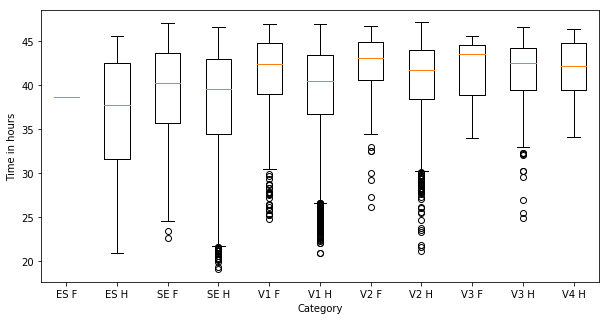

In [7]:
# TIME ANALYSIS WITHOUT 2012 RACE
years_without_12 = ['04','05','06','07','08','09','11','13','14','15','16','17']
results = pd.DataFrame()

for x in years_without_12:
    # INTERATE THROUGH ALL THE DATA
    data = pd.read_csv('https://raw.githubusercontent.com/CascadiaRunner/Thinkful-Capstone-1/master/utmb_20' + x + '.csv')
    
    # CHANGES ALL NATIONALITY DATA TO UPPERCASE
    data['nationality'] = data['nationality'].str.upper()
    
    # PULLS DATA FROM THE .CSV FILES FOR ANALYSIS
    results = pd.concat([data['rank'], 
                         data['nationality'], 
                         data['category'], 
                         data['name'], 
                         data['time']], axis=1).append(results)

# REMOVE DNFS
results = results[results['nationality'] != ' ']
results = results[results['time'] != np.nan]

# CONVERT TIME FROM STRING TO TIMEDELTA FORMAT
results.sort_values(['time'], inplace=True)
results = results.dropna()
results['timeparse'] = results['time'].apply(convert_string_to_datetime)
results['hours'] = results['timeparse'].dt.total_seconds() / 60 / 60

# CREATE BOX PLOTS OF FINISHING TIMES BY CATEGORY
rankedcat = []
for x in catlist:
    rankedcat.append(results.loc[results['category'] == x, 'hours'])
    
plt.figure(1, figsize=(10,5))
plt.boxplot(rankedcat, labels=catlist)
plt.ylabel('Time in hours')
plt.xlabel('Category')
plt.show()

This time data clearly shows the majority of all runners in all categories finish around 40 hours which supports the point in the introduction that the majority of runners finish much later in the race versus the top runners.  These box plots show us where the prevalence the top runners, shown as outlier values, finish the race.  We can see there are many more outliers among men than women and men have faster outlier values when comparing the same age group to women.  Additionally, there are many more outliers in the older age groups than younger. 

These outliners tell us about the variability for the dataset.  Perhaps we have not seen a true representation of how a true sampling across all runners will perform at UTMB.  But, most likely due to the reputation of this race being extreme and difficult, the only runners who end up running tend to be some of the top runners in the world.  (And the top outliers, like Macro Olmo!)  Hence, the distribution is skewed with the bottom whisker showing the top 25% of values being much larger and many outliers versus the shorter top whisker representing the bottom 25%.

## Data Experimentation Proposal ## 

A shoe company has developed a new shoe that engineers have developed to help the runner run faster. This experiment will be a live test to see whether or not the new shoe helped the runner run the Ultra Trail Mont Blanc faster.

Hypothesis: Will a new shoe cause the runner to be faster and finish the 160km course in a significantly less time than the control group.
Null Hypothesis: No difference in time.

Rollout plan:  For this experiment, we will use an A/B test.  For next years race, one group of runners will get a regular shoe and will be the control group while another group of runners will get the experimental shoe.  Both shoes will be colored the same and will not look different.  

This experiment needs a diverse group of elite runners.  Why elite runners?  Cutoffs.  As illustrated above, less than half of all runners finish the race because they miss a timing cutoffs and are forced to DNF.  Elite runners will have a much better chance of finishing the race help us measure a result.  Given that the most elite runners come from 3 gender/age categories we will need to choose runners mostly from these categories.   

We will use a group of 40 elite runners - Each group will be divided up into equal groups of 20 and have the same average time based on their past performances at UTMB.  While simulating the experiment, this sample size will give us enough runners to give us a statistically significant difference in p-values and should help cut down on the ‘noise’. 

Evaluation:
We will use a T-test to detect a statistically significant difference between the two groups.  If the p-value of the t-test is less than 0.05 we can then reject the null hypothesis.  We should also consider the individual runner's performance against prior performances.  If a runner performed weaker than in the past, we should question whether the runner was fully healthy on race day and perhaps leave that time out of the experiment.  We should also evaluate the shoe to detect any deficiencies or failures during the race which could provide misleading results.

Finally, this might not be the only race the shoe is tested at.  This experiment should also be carried out at several trail races around the world.  This will help us detect whether or not the results of this test were just a coincidence or if there is a pattern statistical significant difference in the experimental shoe groups.
